In [1]:
import Pkg;
Pkg.instantiate()
using DrugResponseModel
using Plots;

concs, populations, g1s, g2s = load(192);
g0 = g1s[1,1,1]+g2s[1,1,1];

┌ Info: Precompiling DrugResponseModel [f46a7e40-ab32-11e9-0ff4-0323d592fbfd]
└ @ Base loading.jl:1273


In [2]:
# fitness, pp = optimize_hillAll(concs, g1s, g2s; maxstep=5E4)
# parameters for 95.5 hours
pp = [50.2552, 0.866725, 2.41775e-5, 1.96785, 0.0185627, 0.0447356, 108.176, 1.16593, 1.3052, 2.86005e-5, 0.348876, 0.438606, 14.4648, 2.15448, 1.42977, 2.99996, 0.0216477, 0.196135, 4.03273, 3.93278, 1.86825e-5, 0.867674, 0.430368, 0.241053, 1.68177, 1.17228, 0.508321, 34.5786, 37.9849, 20.7341, 9.11408];
# parameters for 48 hours
# pp = [26.2886, 1.66257, 0.00420596, 1.72685, 0.000269988, 0.0381786, 90.4055, 1.78875, 0.00281889, 0.00554305, 0.106428, 0.587973, 61.9056, 0.99193, 0.353436, 0.960822, 0.010234, 0.243887, 3.95979, 5.33563, 0.821778, 0.233281, 0.994036, 0.484493, 2.22629, 1.51153, 0.549618, 54.5237, 47.917, 46.5612, 16.4902];
# parameters for 72 hours
# pp = [42.8209, 0.89888, 0.00689597, 2.77885, 0.0195601, 0.0558532, 182.449, 1.01496, 0.695658, 0.0968922, 0.32105, 0.681382, 77.7469, 1.0493, 0.54269, 0.993221, 0.0642375, 0.338315, 3.82941, 5.09853, 1.74034, 0.765544, 0.807928, 0.362256, 1.95095, 1.75848, 0.517349, 42.6188, 54.8984, 44.7089, 11.7881];

To see a smoother curve, we have divided the concentration range into 50 time points--instead of 8.

In [3]:
moreConcs = zeros(50,4)
for i=1:4
    moreConcs[:, i] = range(minimum(concs[:, i]),stop=maximum(concs[:, i]),length=50)
end
ps = copy(pp)
moreeffs = getODEparamsAll(ps, moreConcs);
morelapat = moreeffs[:,:,1];
moredox = moreeffs[:,:,2];
moregemc = moreeffs[:,:,3];
morepac = moreeffs[:,:,4];

In [4]:
effs = getODEparamsAll(pp, concs)
t = LinRange(0.0, 48.0, 96)
# each of the following are 9x8 matrices
lapat = effs[:,:,1];
dox = effs[:,:,2];
gemc = effs[:,:,3];
pac = effs[:,:,4];

### temporal combination

In [5]:
temporal_combination(lapat[:,6], gemc[:,6], g0, "lap + gemc")

[6.048688754832427e18, 6.121693157664582e18, 6.20841871644166e18, 6.308528619373129e18, 6.421404929520939e18, 6.546759747693232e18, 6.688793333761398e18, 6.841345624346871e18, 7.023348870253346e18, 7.191234562729876e18, 7.426138668679369e18, 7.589011400018932e18, 7.874812395648291e18, 8.063327864489875e18, 8.33360158219764e18, 8.62289999809781e18, 8.85177337478319e18, 9.164416183496626e18, 9.477707721139753e18, 9.731464816117875e18, 1.0039792924461339e19, 1.0370120161789686e19, 1.0628877384662505e19, 1.0878572267981031e19, 1.1169233921531273e19, 1.1420307511185852e19, 1.1590824075248249e19, 1.174694505929399e19, 1.1917185913222496e19, 1.2038533212039148e19, 1.2070471393830914e19, 1.2056357154850742e19, 1.2045709752065819e19, 1.2021671765135464e19, 1.0676128991489298e19, 1.0239662218868668e19, 9.791969161256135e18, 9.369652000818455e18, 8.98385991911375e18, 8.615885710825759e18, 8.240709416966852e18, 7.849030775184697e18, 7.459519131146961e18, 7.088724690251245e18, 6.771295026398436e18,

ArgumentError: ArgumentError: matrix contains Infs or NaNs

### Bliss Combination

The following calculates the Bliss combination of the given two drugs. First, they are written in the fractional unit by subtracting them from the control condition effect (which is the same for all of the drugs), with the following formulation. Then we convert the values back to original unit.\
x = drugA effect \
y = drugB effect \
Bliss = x + y - (x.y) \
Then, we plot the concentration versus the effect alone, and when we have combination with the amount of the drugB equal to their EC50. 
In the following, we have paclitaxel alone, and when it is combined with 5 nM of gemcitabine.

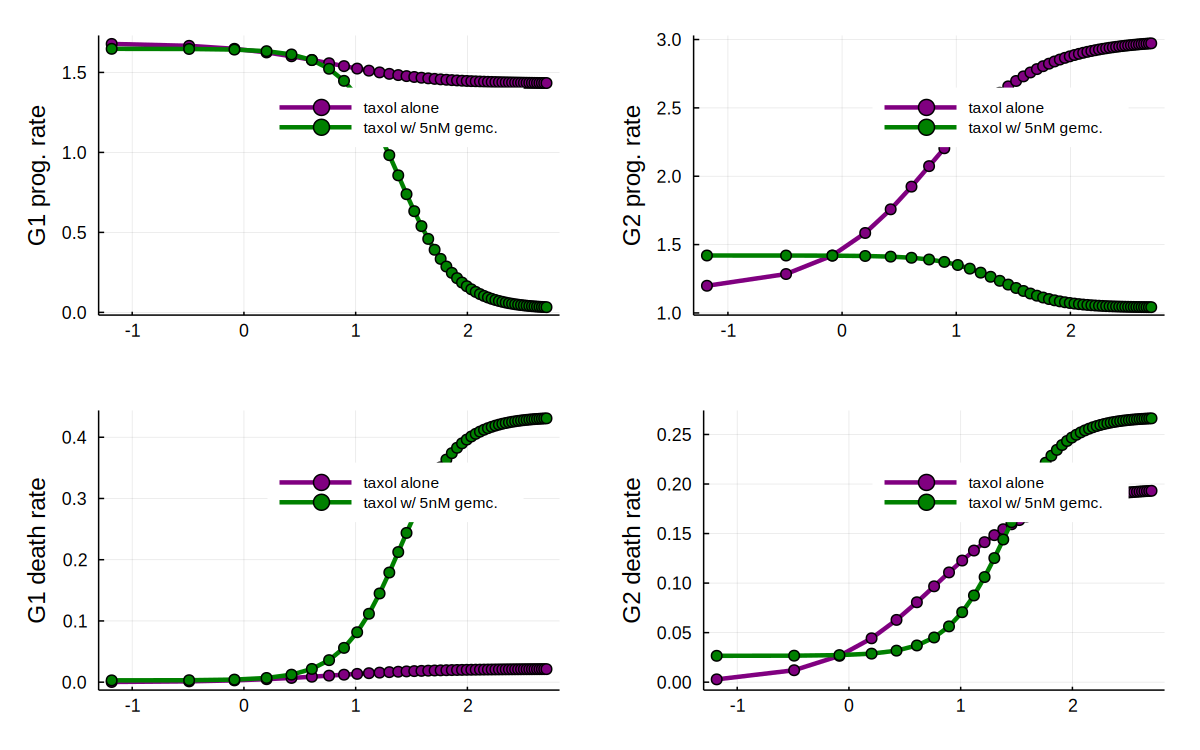

In [8]:
combin = BlissCombination(morepac, moregemc,50)
plotEffectsCombin(moreConcs, moregemc, combin)

The following shows the number of cells over concentration with paclitaxel alone, and with 5 nM of gemcitabine, at t = 96 hrs.

In [9]:
combinedparams = fullCombinationParam(morepac, moregemc, moreeffs,50)
combination = combinedparams[:, :, 5]
plotNumcells(morepac, combination, moreConcs[:,4], g0,50)

MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

### Lapatinib

In [10]:
ODEplot_all(lapat, g1s[:, :, 1], g2s[:, :, 1], populations[1], concs[:, 1])


MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

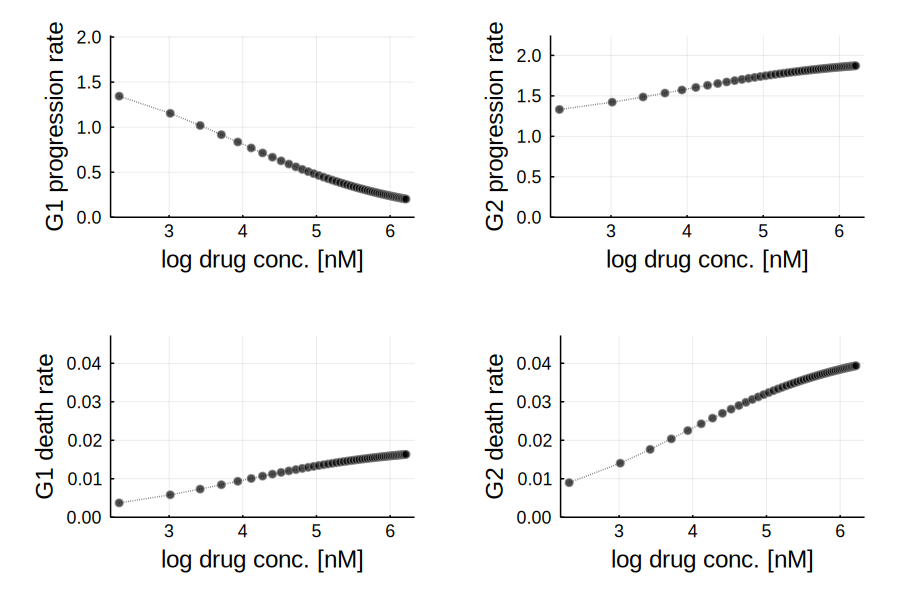

In [11]:
plot_parameters(moreConcs[:, 1], morelapat)

In [12]:
g0 = g1s[1,1,1] + g2s[1,1,1]
T = 170
plotGradient(lapat, concs[:, 1], g0, T)

MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

### Doxorubicin

In [13]:
ODEplot_all(dox, g1s[:, :, 2], g2s[:, :, 2], populations[2], concs[:, 2])


MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

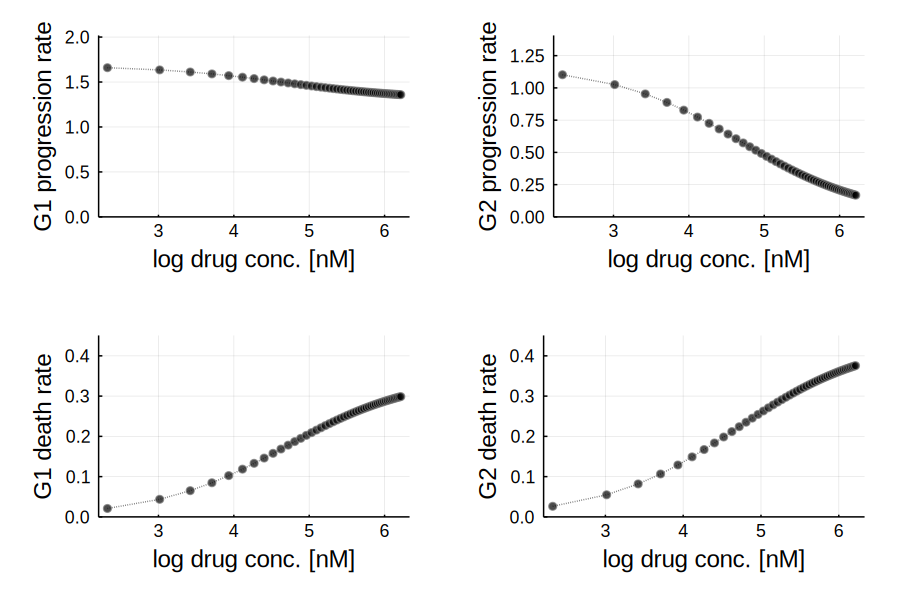

In [14]:
plot_parameters(moreConcs[:, 2], moredox)

In [15]:
g0 = g1s[1, 1, 2] + g2s[1,1,2]

plotGradient(dox, concs[:, 2], g0, T)

MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

### Gemcitabine

In [16]:
ODEplot_all(gemc, g1s[:, :, 3], g2s[:, :, 3], populations[3], concs[:, 3])


MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

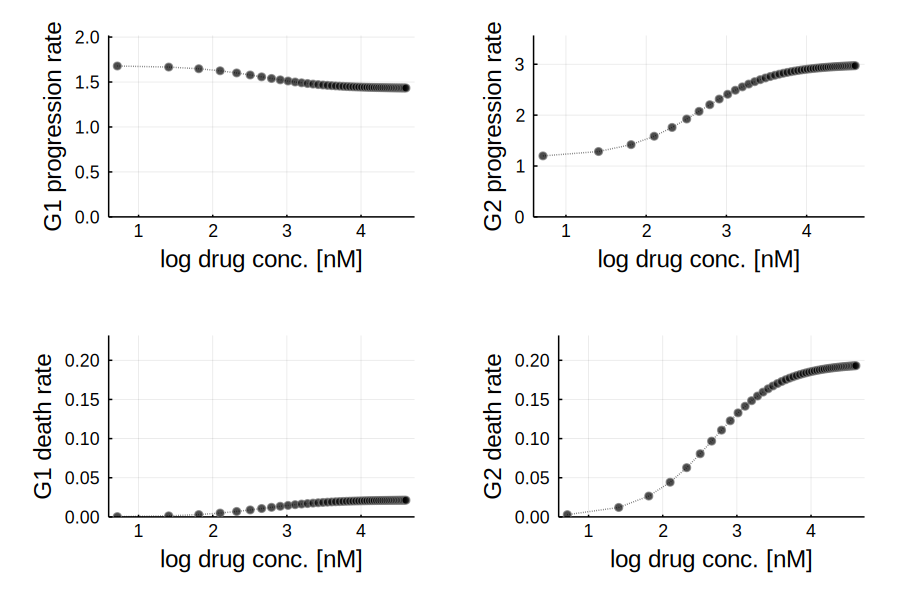

In [17]:
plot_parameters(moreConcs[:, 3], moregemc)

In [18]:
g0 = g1s[1, 1, 3] + g2s[1,1,3]

plotGradient(gemc, concs[:, 3], g0, T)

MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

### Paclitaxel

In [19]:
ODEplot_all(pac, g1s[:, :, 4], g2s[:, :, 4], populations[4], concs[:, 4])


MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...

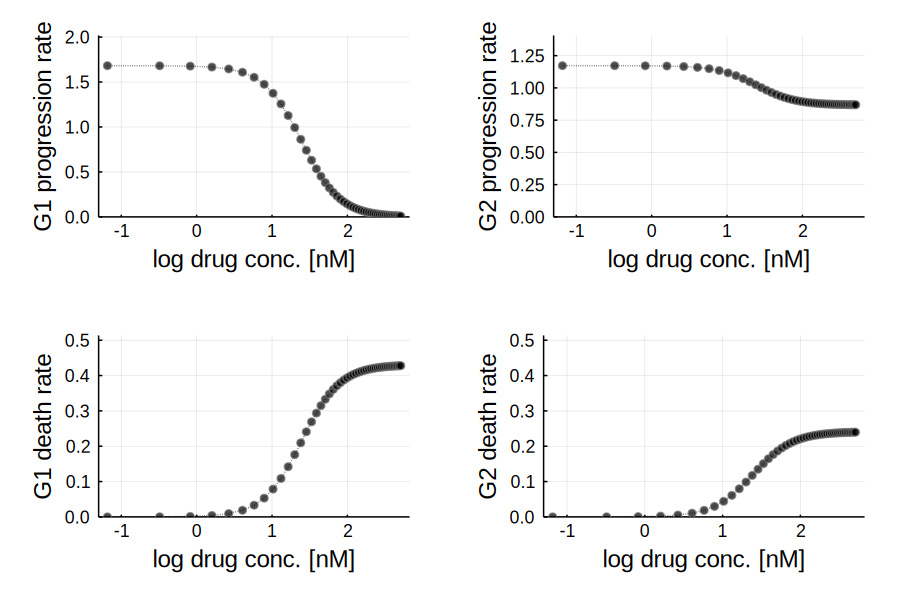

In [20]:
plot_parameters(moreConcs[:, 4], morepac)

In [21]:
g0 = g1s[1, 1, 4] + g2s[1,1,4]

plotGradient(pac, concs[:, 4], g0, T)

MethodError: MethodError: no method matching iterate(::Nothing)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:600
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:600
  iterate(!Matched::ExponentialBackOff) at error.jl:218
  ...